## Bedroom:


=== FFT Spectral Slope in Bedroom Scenes ===
Real      Mean Slope: 0.43805
GAN       Mean Slope: 0.71278
Diffusion Mean Slope: 0.69830


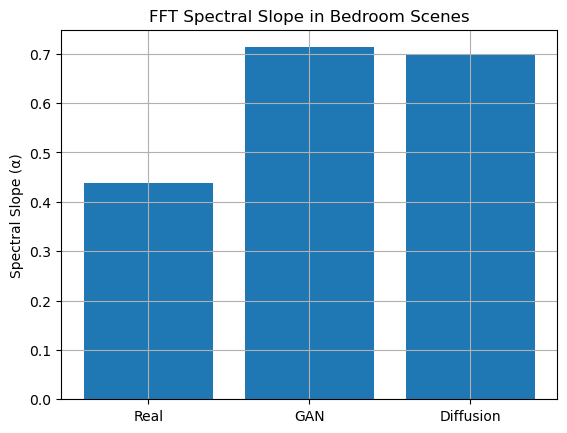

In [12]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_fft_slope(image):
    """Compute log-magnitude FFT and power-law slope of radial profile"""
    H, W = image.shape
    f_transform = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transform)
    log_magnitude = np.log(1 + np.abs(f_shifted))

    # Compute radial profile
    y, x = np.indices((H, W))
    center = np.array([H // 2, W // 2])
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)

    radial_sum = np.bincount(r.ravel(), weights=log_magnitude.ravel())
    radial_count = np.bincount(r.ravel())
    radial_profile = radial_sum / (radial_count + 1e-8)

    # Fit power-law slope (avoid f=0)
    freqs = np.arange(1, len(radial_profile))
    log_freqs = np.log(freqs)
    log_power = np.log(radial_profile[1:])
    slope, _, _, _, _ = linregress(log_freqs, log_power)
    return -slope  # negate because decay

def process_fft_slope(folder_path):
    """Process a folder of images and return spectral slopes"""
    slopes = []
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.float32) / 255.0
        slope = compute_fft_slope(img)
        slopes.append(slope)
    return slopes

def summarize_fft_slopes(real_fft, gan_fft, diff_fft, title):
    """Print and plot mean spectral slopes"""
    real_mean = np.mean(real_fft)
    gan_mean = np.mean(gan_fft)
    diff_mean = np.mean(diff_fft)

    print(f"\n=== {title} ===")
    print(f"Real      Mean Slope: {real_mean:.5f}")
    print(f"GAN       Mean Slope: {gan_mean:.5f}")
    print(f"Diffusion Mean Slope: {diff_mean:.5f}")

    plt.bar(['Real', 'GAN', 'Diffusion'], [real_mean, gan_mean, diff_mean])
    plt.title(title)
    plt.ylabel("Spectral Slope (α)")
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_')}.pdf")
    plt.show()

# ========== Example Usage ==========

# TODO: Replace these with valid paths on your machine
real_images_path = '../data/BEST/bedroom/real'
gan_images_path = '../data/BEST/bedroom/gansformer'
diffusion_images_path = '../data/BEST/bedroom/ddpm'

# Run Fourier Transform Analysis
real_fft = process_fft_slope(real_images_path)
gan_fft = process_fft_slope(gan_images_path)
diff_fft = process_fft_slope(diffusion_images_path)

# Plot and report results
summarize_fft_slopes(real_fft, gan_fft, diff_fft, "FFT Spectral Slope in Bedroom Scenes")

## Face


=== FFT Spectral Slope in Face Portraits ===
Real      Mean Slope: 0.56416
GAN       Mean Slope: 0.62327
Diffusion Mean Slope: 0.78313


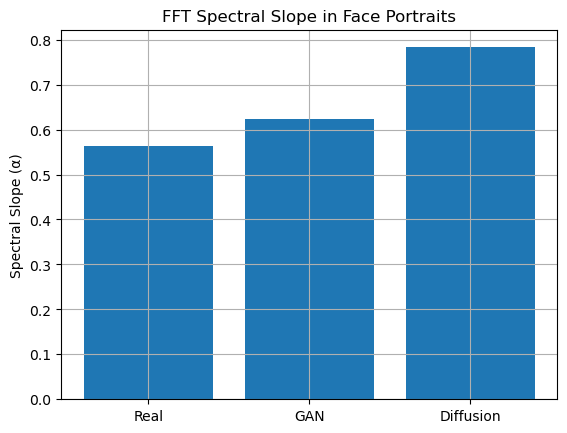

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_fft_slope(image):
    """Compute log-magnitude FFT and power-law slope of radial profile"""
    H, W = image.shape
    f_transform = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transform)
    log_magnitude = np.log(1 + np.abs(f_shifted))

    # Compute radial profile
    y, x = np.indices((H, W))
    center = np.array([H // 2, W // 2])
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)

    radial_sum = np.bincount(r.ravel(), weights=log_magnitude.ravel())
    radial_count = np.bincount(r.ravel())
    radial_profile = radial_sum / (radial_count + 1e-8)

    # Fit power-law slope (avoid f=0)
    freqs = np.arange(1, len(radial_profile))
    log_freqs = np.log(freqs)
    log_power = np.log(radial_profile[1:])
    slope, _, _, _, _ = linregress(log_freqs, log_power)
    return -slope  # negate because decay

def process_fft_slope(folder_path):
    """Process a folder of images and return spectral slopes"""
    slopes = []
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.float32) / 255.0
        slope = compute_fft_slope(img)
        slopes.append(slope)
    return slopes

def summarize_fft_slopes(real_fft, gan_fft, diff_fft, title):
    """Print and plot mean spectral slopes"""
    real_mean = np.mean(real_fft)
    gan_mean = np.mean(gan_fft)
    diff_mean = np.mean(diff_fft)

    print(f"\n=== {title} ===")
    print(f"Real      Mean Slope: {real_mean:.5f}")
    print(f"GAN       Mean Slope: {gan_mean:.5f}")
    print(f"Diffusion Mean Slope: {diff_mean:.5f}")

    plt.bar(['Real', 'GAN', 'Diffusion'], [real_mean, gan_mean, diff_mean])
    plt.title(title)
    plt.ylabel("Spectral Slope (α)")
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_')}.pdf")
    plt.show()

# ========== Example Usage ==========

# TODO: Replace these with valid paths on your machine
real_images_path = '../data/BEST/face/real'
gan_images_path = '../data/BEST/face/stylegan2'
diffusion_images_path = '../data/BEST/face/palette'

# Run Fourier Transform Analysis
real_fft = process_fft_slope(real_images_path)
gan_fft = process_fft_slope(gan_images_path)
diff_fft = process_fft_slope(diffusion_images_path)

# Plot and report results
summarize_fft_slopes(real_fft, gan_fft, diff_fft, "FFT Spectral Slope in Face Portraits")

## ImageNet:


=== FFT Spectral Slope in ImageNet Images ===
Real      Mean Slope: 0.50081
GAN       Mean Slope: 0.89478
Diffusion Mean Slope: 0.61065
(Real: 10000 valid samples, GAN: 10000, Diffusion: 9999)


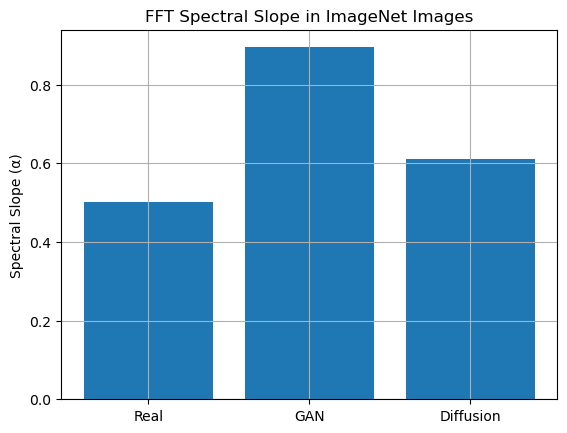

In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_fft_slope(image):
    """Compute log-magnitude FFT and power-law slope of radial profile"""
    H, W = image.shape

    # Skip flat images (e.g. completely black or white)
    if np.std(image) < 1e-6:
        return np.nan

    f_transform = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transform)
    log_magnitude = np.log1p(np.abs(f_shifted))  # safer log(1 + x)

    # Compute radial profile
    y, x = np.indices((H, W))
    center = np.array([H // 2, W // 2])
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)

    radial_sum = np.bincount(r.ravel(), weights=log_magnitude.ravel())
    radial_count = np.bincount(r.ravel())
    radial_profile = radial_sum / (radial_count + 1e-8)

    # Fit power-law slope using non-zero radial values
    freqs = np.arange(1, len(radial_profile))
    power = radial_profile[1:]
    mask = power > 0

    if np.sum(mask) < 10:
        return np.nan

    log_freqs = np.log(freqs[mask])
    log_power = np.log(power[mask])

    if np.any(np.isnan(log_power)) or np.any(np.isinf(log_power)):
        return np.nan

    slope, _, _, _, _ = linregress(log_freqs, log_power)
    return -slope  # negate because decay

def process_fft_slope_imagenet(root_folder):
    """Process ImageNet-style dataset: root folder contains subfolders with images"""
    slopes = []
    for subdir, _, files in os.walk(root_folder):
        for file_name in files:
            if not (file_name.endswith(".jpg") or file_name.endswith(".png")):
                continue
            img_path = os.path.join(subdir, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = img.astype(np.float32) / 255.0
            slope = compute_fft_slope(img)
            slopes.append(slope)
    return slopes

def summarize_fft_slopes(real_fft, gan_fft, diff_fft, title):
    """Print and plot mean spectral slopes"""

    # Remove NaNs
    real_fft = np.array(real_fft)[~np.isnan(real_fft)]
    gan_fft = np.array(gan_fft)[~np.isnan(gan_fft)]
    diff_fft = np.array(diff_fft)[~np.isnan(diff_fft)]

    # Compute means
    real_mean = np.mean(real_fft)
    gan_mean = np.mean(gan_fft)
    diff_mean = np.mean(diff_fft)

    print(f"\n=== {title} ===")
    print(f"Real      Mean Slope: {real_mean:.5f}")
    print(f"GAN       Mean Slope: {gan_mean:.5f}")
    print(f"Diffusion Mean Slope: {diff_mean:.5f}")
    print(f"(Real: {len(real_fft)} valid samples, GAN: {len(gan_fft)}, Diffusion: {len(diff_fft)})")

    plt.bar(['Real', 'GAN', 'Diffusion'], [real_mean, gan_mean, diff_mean])
    plt.title(title)
    plt.ylabel("Spectral Slope (α)")
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_')}.pdf")
    plt.show()

# ========== Example Usage ==========

real_images_path = '../data/BEST/imagenet/real_imagenet'
gan_images_path = '../data/BEST/imagenet/big_gan'
diffusion_images_path = '../data/BEST/imagenet/vq_diffusion'

# Run Fourier Transform Analysis
real_fft = process_fft_slope_imagenet(real_images_path)
gan_fft = process_fft_slope_imagenet(gan_images_path)
diff_fft = process_fft_slope_imagenet(diffusion_images_path)

# Plot and report results
summarize_fft_slopes(real_fft, gan_fft, diff_fft, "FFT Spectral Slope in ImageNet Images")